#### Importing all the necessary libraries and Dataset

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import random
random.seed(42)
warnings.filterwarnings('ignore')

In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
sales = pd.read_csv('Dataset/train.csv')
stores = pd.read_csv('Dataset/store.csv')

In [58]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [59]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Merging the Sales and stores dataset

In [60]:
sales_stores = sales.merge(stores, how ='left', on = 'Store')
sales_stores.set_index('Date', inplace= True)
sales_stores.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-31,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [61]:
sales_stores.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [62]:
sales_stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo

In [63]:
sales_stores.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


#### Preparing the STORETYPE and ASSORTMENTTYPE 

In [64]:
# Cannot see the StoreType/Promo2 in Heatmap
sales_stores.groupby('Promo2')['Sales'].mean()
sales_stores[['Promo2', 'Sales']].corr()

,Promo2,Sales
Promo2,1.00000,-0.09104
Sales,-0.09104,1.00000


In [65]:
sales_stores.StoreType.replace({'a': 1, 'b':2, 'c':3, 'd':4}, inplace= True)
sales_stores.CompetitionOpenSinceYear.fillna(0, inplace= True)
sales_stores.CompetitionOpenSinceYear = sales_stores.CompetitionOpenSinceYear.apply(lambda x : int(x))

In [66]:
sales_stores.Assortment.value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [67]:
sales_stores.Assortment.replace({'a': 1, 'b':2, 'c':3, 'd':4}, inplace= True)

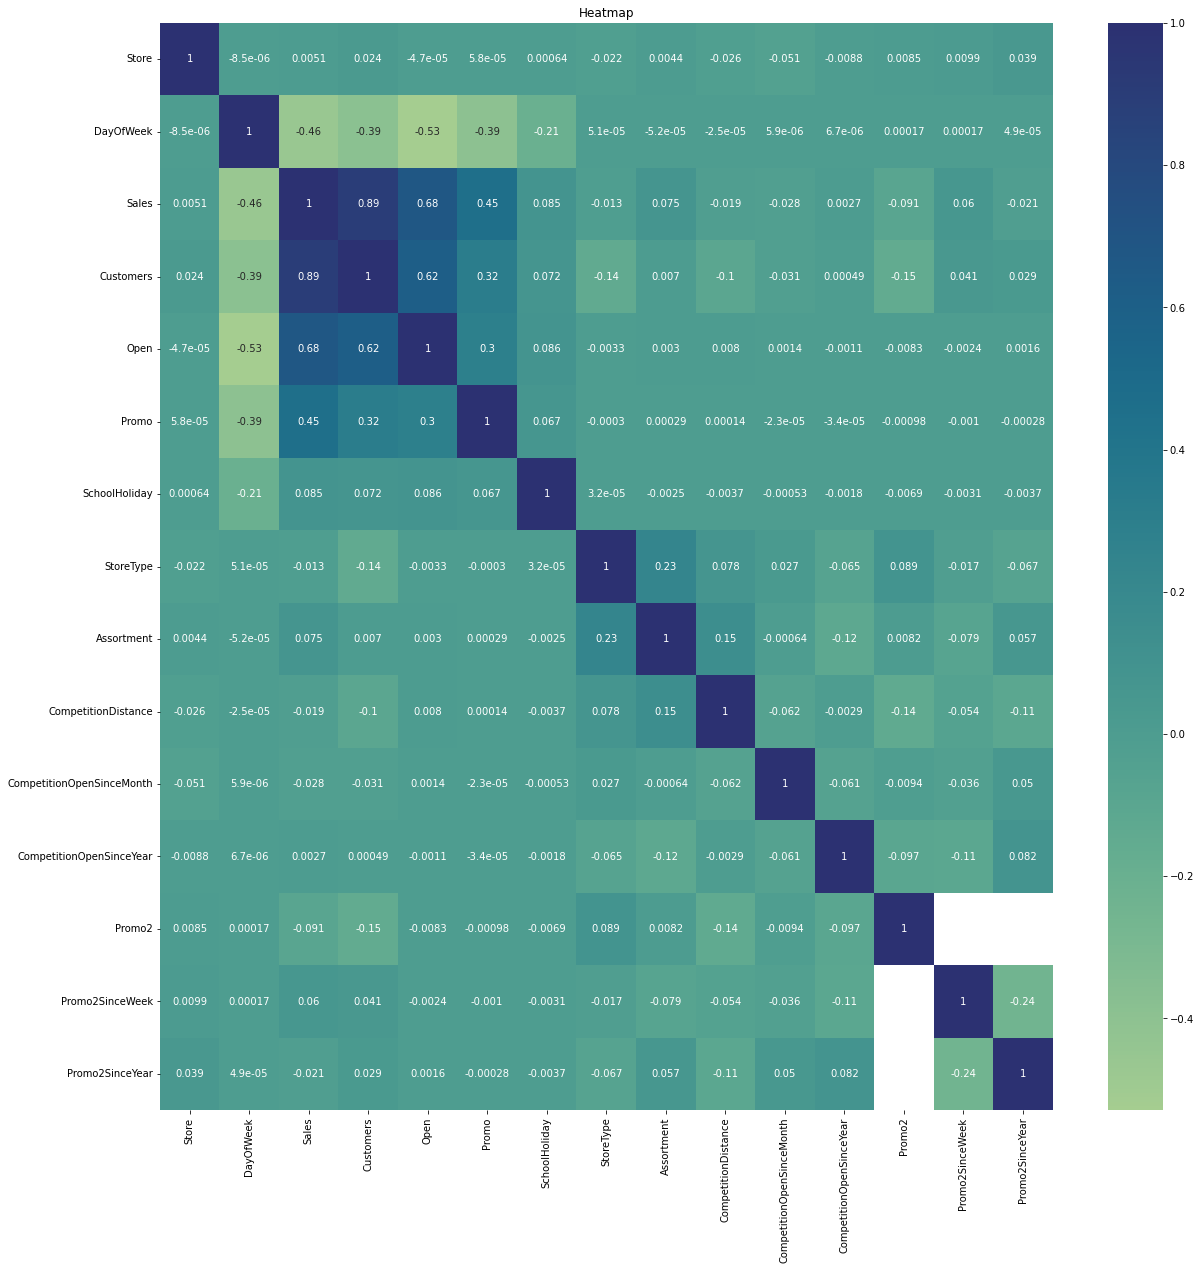

In [68]:
# Heatmap Not avail for Date, StateHoliday
plt.figure(figsize = (20,20))
sns.heatmap(sales_stores.corr(), cmap="crest", annot = True)
plt.title("Heatmap")
plt.show()

### Heatmap shows a high negative correlation between 'Day of week' &  'Sales'
Removing the closed days and generating for the open days only

In [84]:
sales_stores_open.columns
columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

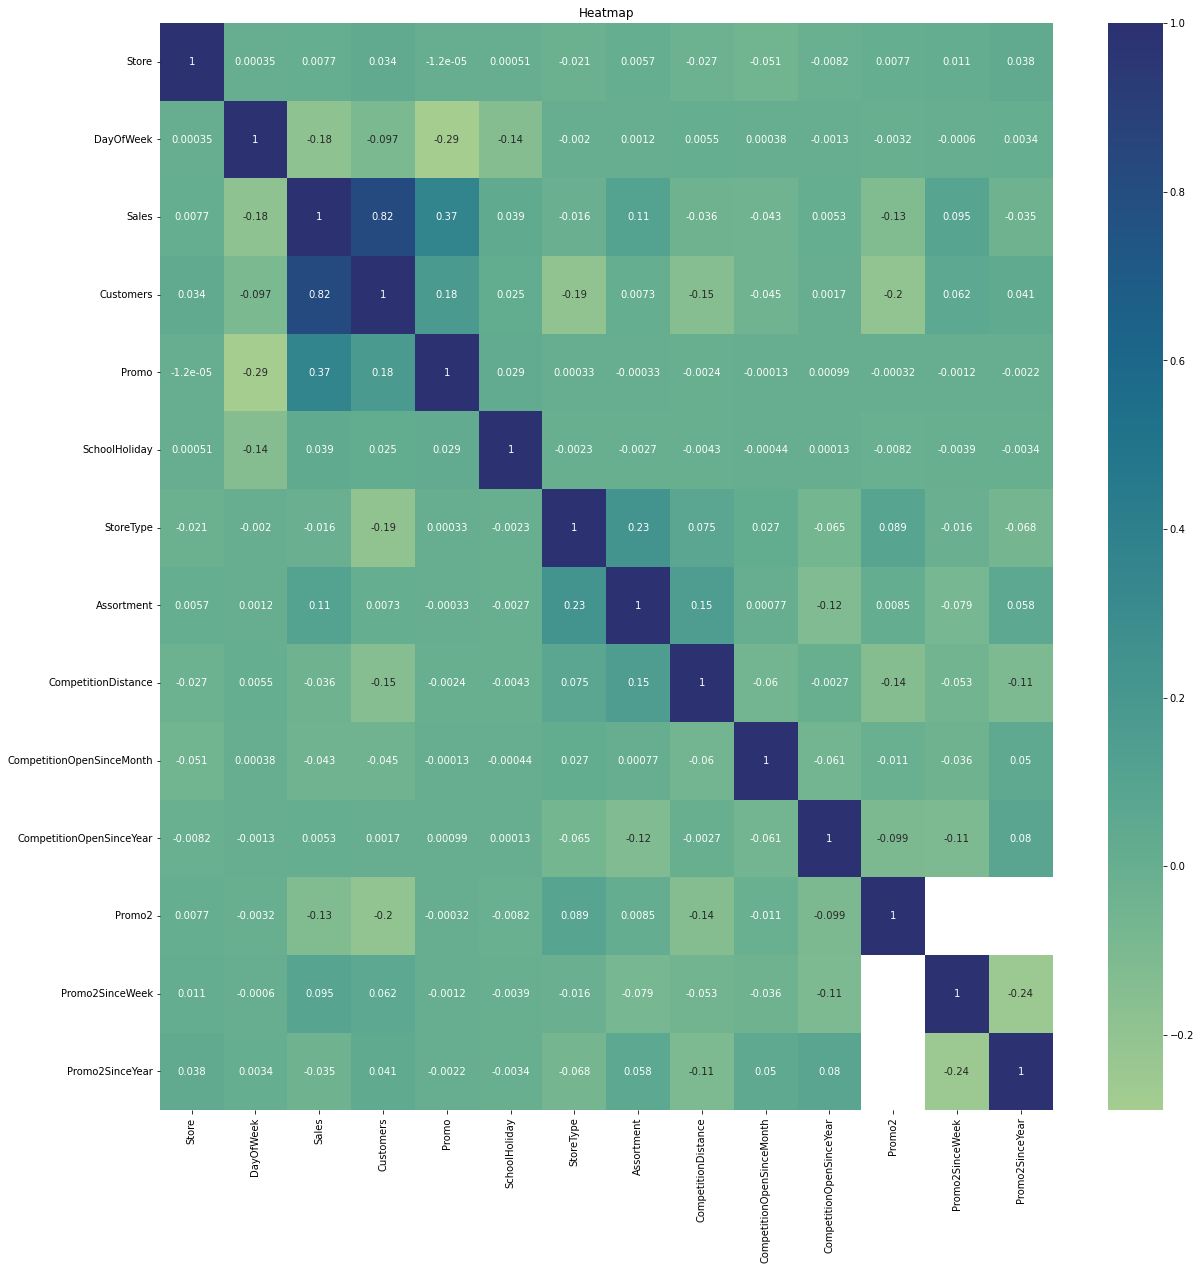

In [85]:
# Checking the heatmap for only open days
sales_stores_open = sales_stores[sales_stores.Open == 1]
sales_open = sales[sales.Open == 1]
# Heatmap Not avail for Date, StateHoliday
plt.figure(figsize = (20,20))
sns.heatmap(sales_stores_open[columns].corr(), cmap="crest", annot = True)
plt.title("Heatmap")
plt.show()

#### Plotting the Highest and Lowest selling Stores

#### preparing the data

In [70]:
sales_average = sales_stores.groupby('Store')['Sales'].mean()

In [71]:
store_w_max_sales = sales_average.argmax()
store_w_min_sales = sales_average.argmin()

In [72]:
def run_sequence_plot (x, y, title ,  mean_line = False, xlabel="time", ylabel="series"):
    """
    A function that plots a line plot for the given values
    parameters:
        x : Values to be plot in x a-xis
        y : values to plot on y-axis( must be same length to parameter x )
        title : Title  of the plot
        xlabel : Xlabel of the plot
        ylabel: Ylabel of the plot
    returns: y
        Line plot
    """
    plt.figure(figsize =(10 ,7))
    plt.plot(x, y, 'k-', label = ylabel)
    if(mean_line  == True):
        plt.axhline(y=np.nanmean(y), color = "red", label = f'mean(= {np.nanmean(y):.2f} )')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45 , rotation_mode='anchor', ha ='right' )
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show();

In [73]:
df_max_sales = sales[sales.Store == store_w_max_sales]
df_min_sales = sales[sales.Store == store_w_min_sales]
df_max_sales_open = df_max_sales[df_max_sales.Open == 1]
df_min_sales_open = df_min_sales[df_min_sales.Open == 1]

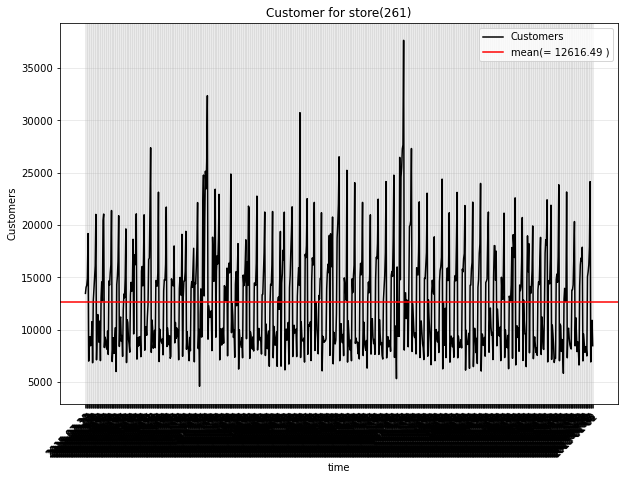

In [74]:
run_sequence_plot(x = df_max_sales_open['Date'],
                  y = df_max_sales_open['Sales'],
                  title = f"Customer for store({store_w_max_sales})",
                  mean_line = True,
                  ylabel = 'Customers')

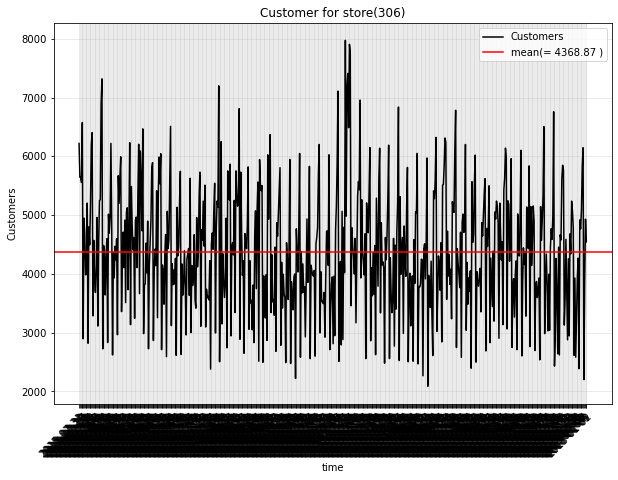

In [75]:
run_sequence_plot(x = df_min_sales_open['Date'],
                  y = df_min_sales_open['Sales'],
                  title = f"Customer for store({store_w_min_sales})",
                  mean_line = True,
                  ylabel = 'Customers')

In [88]:
sns.kdeplot(data=sales_stores_open,x='Sales')
plt.show()